# TIM AI Academy

## Demonstração 15 - Métodos para Seleção de Atributos.

### Prof. Dr. Ahirton Lopes (https://github.com/ahirtonlopes)

# Seleção com Correlação de Pearson

No exemplo apresentado, usamos o coeficiente de correlação de Pearson para analisar a relação entre as variáveis de um dataset simulado de telecom e o Churn (cancelamento de serviço).


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um dataset simulado com correlação mais forte
np.random.seed(42)

# Número de clientes
n = 500

# Atributos
data = {
    'CustomerID': range(1, n+1),
    'Age': np.random.randint(18, 70, n),  # Idade dos clientes
    'MonthlySpend': np.random.uniform(20, 150, n),  # Gasto mensal em reais
    'YearsWithCompany': np.random.randint(1, 10, n),  # Anos de relacionamento
    'CallsPerMonth': np.random.randint(50, 500, n),  # Número de ligações mensais
    'InternetUsage': np.random.uniform(1, 100, n),  # Uso de internet em GB por mês
    'Churn': np.random.choice([0, 1], n)  # Churn: 1 = Cancelou, 0 = Não cancelou
}

# Criando o DataFrame
df = pd.DataFrame(data)

De modo a aumentar a correlação com o Churn, ajustei as variáveis MonthlySpend e CallsPerMonth de forma que sua correlação com Churn seja mais forte.

A ideia aqui é simular um cenário em que o gasto mensal e o número de chamadas mensais estão relacionados com o Churn.

In [33]:
# Manipulando dados para aumentar a correlação com Churn
# Adicionando uma correlação artificial entre MonthlySpend e Churn
df['MonthlySpend'] = df['MonthlySpend'] + (df['Churn'] * np.random.normal(50, 30, n))

# Adicionando uma correlação artificial entre CallsPerMonth e Churn
df['CallsPerMonth'] = df['CallsPerMonth'] + (df['Churn'] * np.random.normal(100, 50, n))

# Calculando a correlação de Pearson entre as variáveis
correlation_matrix = df.corr()

# Exibindo a correlação
print("Matriz de Correlação (Pearson):\n", correlation_matrix)

Matriz de Correlação (Pearson):
                   CustomerID       Age  MonthlySpend  YearsWithCompany  \
CustomerID          1.000000  0.061964     -0.021574          0.031334   
Age                 0.061964  1.000000      0.003492          0.007699   
MonthlySpend       -0.021574  0.003492      1.000000         -0.010289   
YearsWithCompany    0.031334  0.007699     -0.010289          1.000000   
CallsPerMonth       0.022842  0.076552      0.173406          0.020584   
InternetUsage      -0.009096 -0.117413     -0.042756          0.105934   
Churn              -0.061915 -0.042298      0.466262          0.020122   

                  CallsPerMonth  InternetUsage     Churn  
CustomerID             0.022842      -0.009096 -0.061915  
Age                    0.076552      -0.117413 -0.042298  
MonthlySpend           0.173406      -0.042756  0.466262  
YearsWithCompany       0.020584       0.105934  0.020122  
CallsPerMonth          1.000000      -0.021551  0.369535  
InternetUsage       


Correlação com Churn: CustomerID          0.061915
Age                 0.042298
MonthlySpend        0.466262
YearsWithCompany    0.020122
CallsPerMonth       0.369535
InternetUsage       0.071444
Churn               1.000000
Name: Churn, dtype: float64


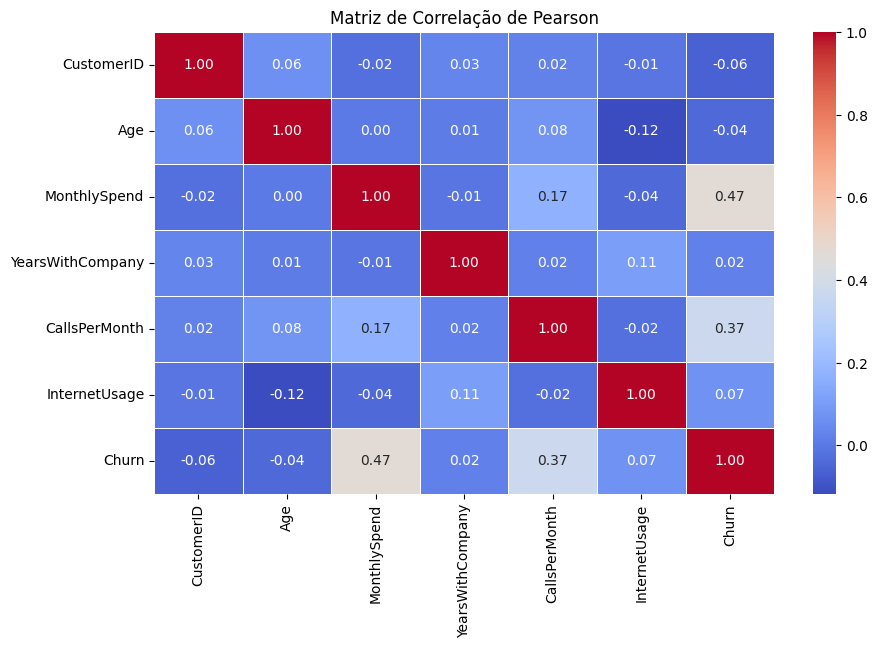


Atributos mais correlacionados com o Churn (sem incluir Churn): ['MonthlySpend', 'CallsPerMonth']


In [34]:
# Focando na correlação com 'Churn'
cor_target = correlation_matrix['Churn'].abs()
print("\nCorrelação com Churn:", cor_target)

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação de Pearson")
plt.show()

# Selecionando features mais correlacionadas com o Churn
# Note que o Churn não será o maior valor (vamos selecionar os atributos com correlação maior que 0.1)
selected_features = cor_target[cor_target > 0.1].index.tolist()
selected_features.remove('Churn')  # Remover Churn da lista
print("\nAtributos mais correlacionados com o Churn (sem incluir Churn):", selected_features)

Após calcular a matriz de correlação, verificamos quais atributos tinham uma correlação significativa com o Churn, utilizando um limiar de 0,1.

O resultado revelou que MonthlySpend e CallsPerMonth estavam entre os atributos mais correlacionados com o Churn, demonstrando como a análise de correlação pode ajudar a identificar fatores relevantes para a previsão de cancelamento.

Este exemplo cria correlações artificiais com o Churn para tornar o problema mais realista.

Em um cenário de dados reais, a correlação entre Churn e outras variáveis pode ser mais sutil e exigir métodos mais sofisticados para identificar os melhores preditores do churn.

Se ainda houver problemas ou erros, podemos ajustar mais ou simular diferentes cenários para torná-lo mais realista.

# Backward Elimination com statsmodels



In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Criar um dataset fictício
data = {
    'Age': [45, 34, 65, 23, 56, 43, 35, 66, 45, 60],
    'Income': [5000, 4000, 7000, 2000, 6000, 3000, 4000, 7500, 5400, 6400],
    'Tenure': [10, 2, 5, 4, 3, 7, 8, 1, 9, 6],
    'MonthlyCharges': [90, 120, 100, 80, 110, 95, 105, 85, 115, 130],
    'TotalCharges': [900, 240, 500, 320, 800, 665, 740, 210, 920, 780],
    'Churn': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

# Separando variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Escalonar os dados para que todos os atributos estejam na mesma escala
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Adicionar uma constante (termo de interceptação)
X_with_const = sm.add_constant(X_scaled)

# Função de Backward Elimination
def backward_elimination(X, y, sl=0.05):
    variables = X.columns
    while len(variables) > 0:
        model = sm.Logit(y, X[variables]).fit()
        p_values = model.pvalues[1:]  # Ignorar o p-value do intercepto
        max_p_value = p_values.max()
        if max_p_value > sl:
            excluded_variable = p_values.idxmax()
            variables = variables.drop(excluded_variable)
        else:
            break
    return variables

# Realizar Backward Elimination
selected_features_backward = backward_elimination(X_with_const, y)

print("Características selecionadas com Backward Elimination:", selected_features_backward)

         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.650290
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657252
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
Características selecionadas com Backward Elimination: Index(['const'], dtype='object')


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/dis

O erro "Complete Separation: The results show that there is complete separation or perfect prediction." ocorre quando, em uma regressão logística, a variável dependente (neste caso, Churn) pode ser perfeitamente predita pelas variáveis independentes.

Isso significa que, para os valores das variáveis independentes, há uma separação perfeita entre as classes da variável dependente.

Isso pode acontecer quando um dos preditores é altamente informativo ou está correlacionado com a variável dependente de maneira que torna impossível a estimativa dos parâmetros do modelo (ou seja, o modelo não consegue encontrar uma solução de máxima verossimilhança, o que é a base para o treinamento de um modelo de regressão logística).

# Seleção com Algoritmos Genéticos


A seleção de atributos usando algoritmos genéticos é uma abordagem inspirada no processo de evolução natural. Ela envolve a criação de uma população de soluções (conjuntos de atributos) que evoluem ao longo de várias gerações.

Cada solução é representada por um "indivíduo" em uma população e é avaliada por uma função de aptidão (fitness), que mede o quão bem o conjunto de atributos selecionados contribui para a tarefa de aprendizado, como a previsão de Churn ou classificação de clientes.

Os algoritmos genéticos operam por meio de três operações principais: seleção, cruzamento (crossover) e mutação. Na seleção, os indivíduos mais aptos, ou seja, aqueles que apresentam melhores desempenhos, têm mais chances de "se reproduzir" e gerar a próxima geração.

O cruzamento cria novos indivíduos ao combinar os atributos dos pais, enquanto a mutação altera aleatoriamente alguns dos atributos selecionados, introduzindo diversidade na população. Esse ciclo se repete até que se alcance um critério de parada, como um número máximo de gerações ou uma melhoria mínima no desempenho do modelo.

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from deap import base, creator, tools, algorithms
from sklearn.metrics import accuracy_score

# Exemplo de DataFrame de telecomunicações
data = {
    'Age': [25, 45, 35, 50, 30],
    'Tenure': [12, 24, 18, 6, 48],
    'Service': ['Cable', 'DSL', 'DSL', 'Fiber', 'Cable'],
    'MonthlyCharges': [70, 45, 55, 90, 100],
    'Churn': [1, 0, 1, 0, 1]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Convertendo variáveis categóricas em variáveis dummy
X = pd.get_dummies(df.drop(columns=['Churn']), drop_first=True)
y = df['Churn']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo o algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Função de avaliação do modelo
def eval_individual(individual):
    selected_features = [X.columns[i] for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:  # Prevenir erro ao não selecionar nenhuma feature
        return 0,
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred),

# Criando o ambiente do algoritmo genético
toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_individual)

# Criando a população
population = toolbox.population(n=10)

# Executando o algoritmo genético
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# Selecionando o melhor indivíduo
best_individual = tools.selBest(population, 1)[0]
selected_features_genetic = [X.columns[i] for i in range(len(best_individual)) if best_individual[i] == 1]
print(f"Características selecionadas com Algoritmo Genético: {selected_features_genetic}")

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	10    
1  	6     
2  	4     
3  	7     
4  	7     
5  	5     
6  	4     
7  	5     
8  	7     
9  	3     
10 	3     
Características selecionadas com Algoritmo Genético: ['Age']
